<a href="https://colab.research.google.com/github/danarcanjosilva/photo-colorizer-colab/blob/main/photo_colorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ====================================================
# Script de Colorização para Google Colab
# Baseado no DeOldify (https://github.com/jantic/DeOldify)
# Licença MIT Original: LICENSE-DeOldify
# Adaptado por: Daniel Arcanjo da Silva
# Fix compatível com Colab 2025/2026
# ====================================================

# 🔥 LIMPA TUDO QUE PODE CAUSAR CONFLITO
!pip uninstall -y numpy torch torchvision torchaudio fastai Pillow -q

# 🔒 VERSÕES COMPATÍVEIS COM DEOLDIFY
!pip install -q numpy==1.26.4
!pip install -q torch==2.0.1 torchvision==0.15.2
!pip install -q fastai==1.0.61
!pip install -q Pillow==9.5.0
!pip install -q ffmpeg-python yt-dlp


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.18.1 requires torch>=1.13.0, which is not installed.
scikit-image 0.25.2 requires pillow>=10.1, which is not installed.
gradio 5.50.0 requires pillow<12.0,>=8.0, which is not installed.
accelerate 1.12.0 requires torch>=2.0.0, which is not installed.
wordcloud 1.9.6 requires pillow, which is not installed.
torchtune 0.6.1 requires Pillow>=9.4.0, which is not installed.
matplotlib 3.10.0 requires pillow>=8, which is not installed.
sentence-transformers 5.2.1 requires torch>=1.11.0, which is not installed.
imageio 2.37.2 requires pillow>=8.3.2, which is not installed.
bokeh 3.7.3 requires pillow>=7.1.0, which is not installed.
diffusers 0.36.0 requires Pillow, which is not installed.
dopamine-rl 4.1.2 requires Pillow>=7.0.0, which is not installed.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_ver

In [2]:
import numpy as np
import torch

print("✅ Ambiente verificado")
print("Python OK")
print(f"NumPy: {np.__version__}")
print(f"PyTorch: {torch.__version__}")

# teste rápido numpy + torch
print(torch.from_numpy(np.array([1, 2, 3])))


✅ Ambiente verificado
Python OK
NumPy: 1.26.4
PyTorch: 2.10.0+cu128
tensor([1, 2, 3])


In [1]:
!git clone https://github.com/jantic/DeOldify.git
%cd DeOldify

!mkdir -p models
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth \
    -O models/ColorizeArtistic_gen.pth


fatal: destination path 'DeOldify' already exists and is not an empty directory.
/content/DeOldify
--2026-01-29 18:59:59--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 84.17.38.227, 2400:52e0:1500::1024:1
Connecting to data.deepai.org (data.deepai.org)|84.17.38.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘models/ColorizeArtistic_gen.pth’

models/ColorizeArti 100%[===================>] 243.32M  4.91MB/s    in 49s     

2026-01-29 19:00:48 (4.99 MB/s) - ‘models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [2]:
# 🔥 PATCH DEFINITIVO PARA DEOLDIFY NO COLAB (2025+)

import warnings
warnings.filterwarnings("ignore")

import torch
import numpy as np

# ===============================
# PATCH CRÍTICO: desativar weights_only
# ===============================

_original_torch_load = torch.load

def torch_load_compat(*args, **kwargs):
    kwargs["weights_only"] = False
    return _original_torch_load(*args, **kwargs)

torch.load = torch_load_compat

print("✅ torch.load patch aplicado (weights_only=False)")

# ===============================
# IMPORTS DO DEOLDIFY
# ===============================

from deoldify import device
from deoldify.device_id import DeviceId
from deoldify.visualize import *

print("✅ DeOldify imports OK")


✅ torch.load patch aplicado (weights_only=False)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
✅ DeOldify imports OK


In [3]:
device.set(device=DeviceId.GPU0)
torch.backends.cudnn.benchmark = True

print("✅ GPU configurada")


✅ GPU configurada


In [4]:
colorizer = get_image_colorizer(artistic=True)
print("🎨 Colorizer pronto")


🎨 Colorizer pronto


In [5]:
from google.colab import files
import os, shutil

os.makedirs("test_images", exist_ok=True)

print("🖼️ Envie a imagem para colorização")
uploaded = files.upload()

if not uploaded:
    raise ValueError("Nenhuma imagem enviada")

filename = next(iter(uploaded))
target = f"test_images/{filename}"
shutil.move(filename, target)

print(f"📁 Imagem salva em: {target}")


🖼️ Envie a imagem para colorização


Saving 0cc0c042-caca-4532-8faf-c9a7733cf0a3.png to 0cc0c042-caca-4532-8faf-c9a7733cf0a3.png
📁 Imagem salva em: test_images/0cc0c042-caca-4532-8faf-c9a7733cf0a3.png


🎨 Processando imagem...
✨ Colorização concluída


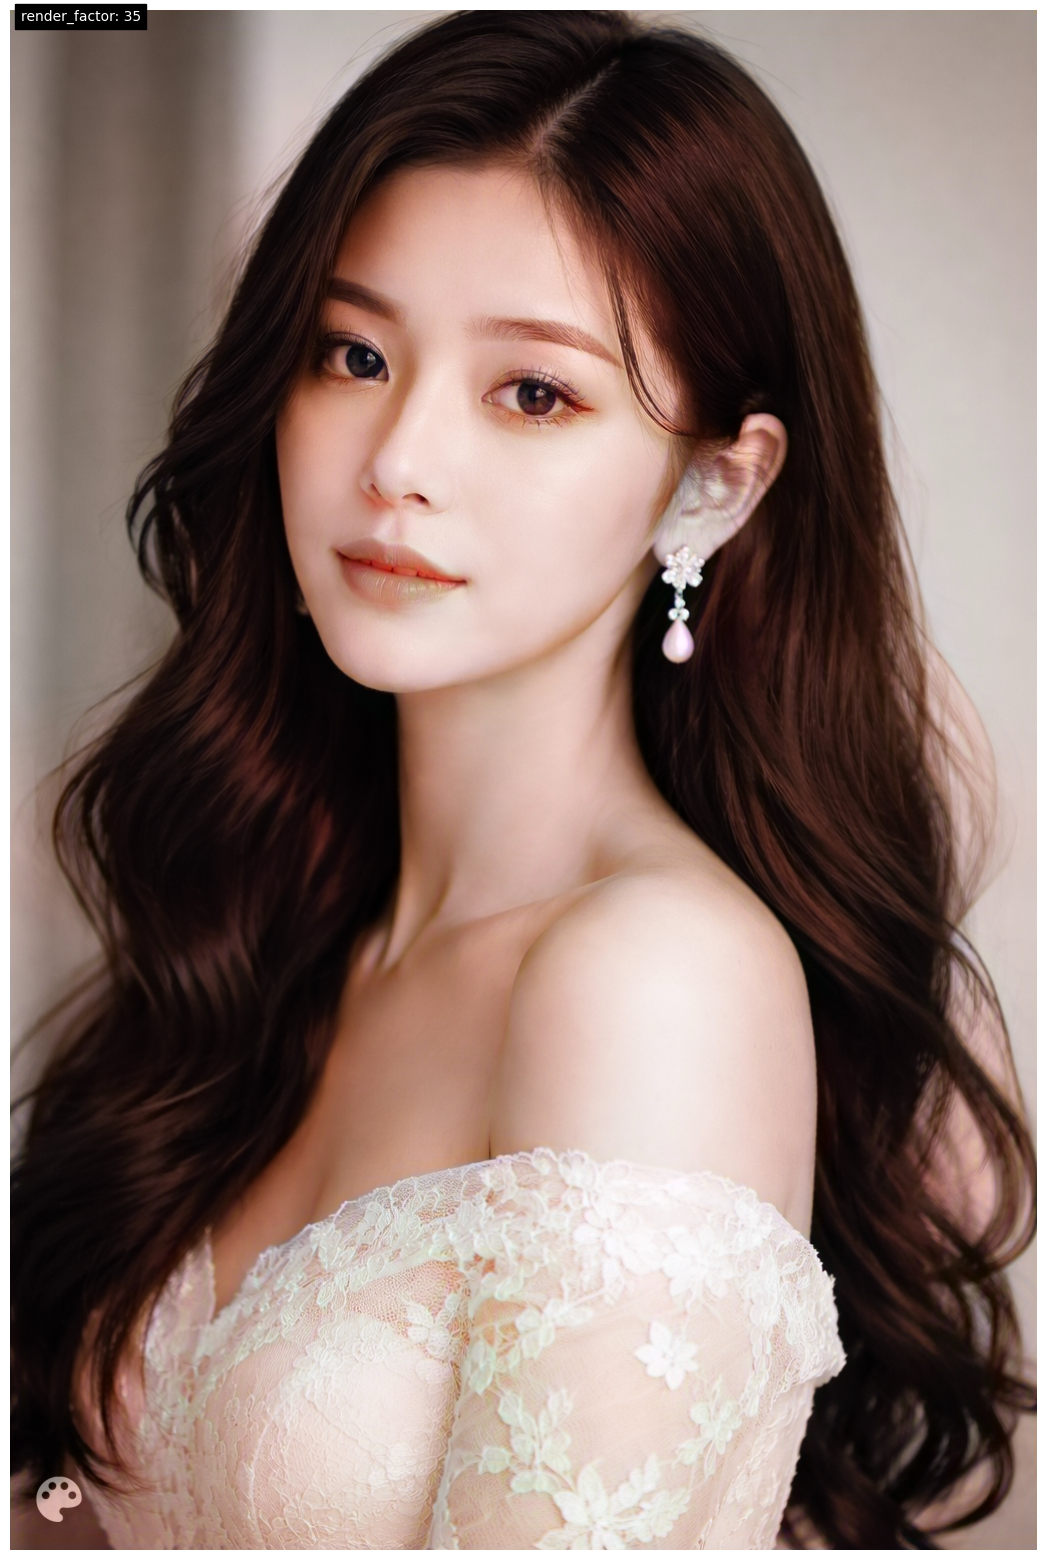

In [6]:
print("🎨 Processando imagem...")

colorizer.plot_transformed_image(
    target,
    render_factor=35,
    display_render_factor=True,
    figsize=(20, 20)
)

print("✨ Colorização concluída")
